In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt

from utils import *

In [2]:
from optimization.range.MethodSven import method_sven_iterations_list
from optimization.range.MethodSven import method_sven

from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_list
from optimization.range.SearchDichotomous import search_dichotomous

from optimization.range.HalvingMethod import halving_method
from optimization.range.HalvingMethod import halving_method_iterations_list

from optimization.range.SearchGoldenSection import search_golden_section
from optimization.range.SearchGoldenSection import search_golden_section_iterations_list

from optimization.range.SearchPitchAdaptation import search_pitch_adaptation
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_list
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_label

from interpolition.ThreePointQuadratic import threePointQuadratic
from interpolition.ThreePointQuadratic import threePointQuadratic_list
from interpolition.ThreePointQuadratic import threePointQuadratic_label

from interpolition.CubicInterpolation import cubicInterpolation
from interpolition.CubicInterpolation import threePointQuadratic_list
from interpolition.CubicInterpolation import threePointQuadratic_label

from optimization.n_dimensional.CoordinateDescent import get_coordinate_descent
from optimization.n_dimensional.CoordinateDescent import coordinate_descent_iter_list


In [3]:
x0 = 3.0
h = 2.0
n = 200

count_invoke = 0
f = lambda x: 20 * (x + 5).__pow__(2)
f_arr = lambda X: np.transpose([X, f(X)])

columns = ['x', 'y', 'h']
epsilon = 0.01
iter = 500

In [11]:
def f(X):
    return (X[0] - 1) ** 2 + (X[1] - 1) ** 2


nd_start_point = np.array([-15.0, -15.0])
nd_epsilon = 0.02
nd_iter = 200

In [5]:
def draw_3d_function(f, steps, width, height):
    X, Y = np.meshgrid(np.linspace(-width, width, 30), np.linspace(-height, height, 30))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')

    zs = np.array([f(np.array([x, y])) for x, y in zip(np.ravel(Y), np.ravel(X))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)
    ax.plot(xs=steps[0], ys=steps[1], zs=steps[2],
            marker='*', markersize=20, zorder=3,
            markerfacecolor='y', lw=3, c='black')
    return ax


def add_sven_to_optimisation(optimization_algoritm):
    def optimization(f, x):
        range = method_sven(x, h, f, n)
        min, max
        result = search_dichotomous(f, min(range), max(range), epsilon=epsilon, iter=iter)
        return result[0]

    return optimization

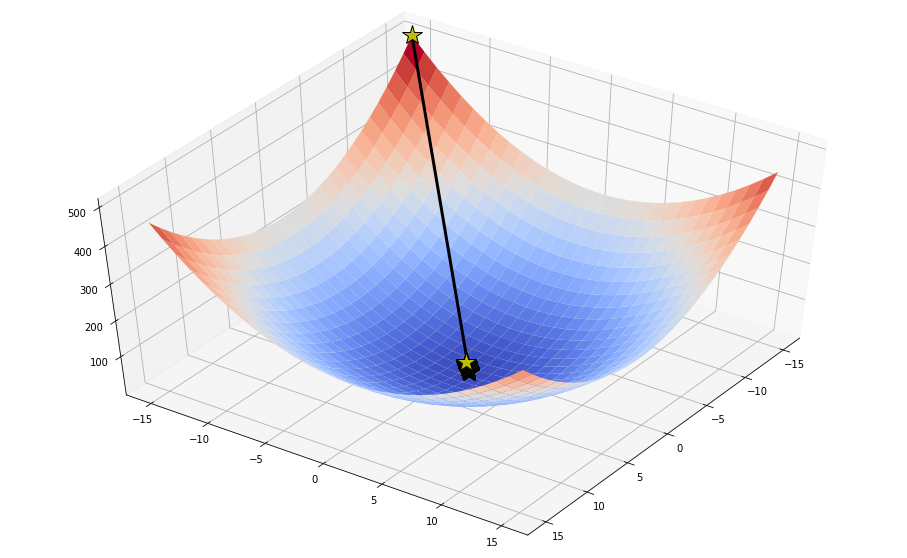

array([[-15.0, -15.0, 512.0],
       [0.9951790945870536, 0.9951790945870536, 4.6482258001152594e-05],
       [0.9854123070126488, 0.9854123070126488, 0.00042560157338643],
       [0.9756455194382441, 0.9756455194382441, 0.001186281446865895],
       [0.9658787318638393, 0.9658787318638393, 0.0023285218784395477],
       [0.9561119442894346, 0.9561119442894346, 0.003852322868107388],
       [0.9463451567150298, 0.9463451567150298, 0.005757684415869416],
       [0.9365783691406251, 0.9365783691406251, 0.008044606521725632],
       [0.9268115815662203, 0.9268115815662203, 0.010713089185676036],
       [0.9170447939918156, 0.9170447939918156, 0.013763132407720627],
       [0.9072780064174109, 0.9072780064174109, 0.017194736187859407],
       [0.8975112188430061, 0.8975112188430061, 0.02100790052609237],
       [0.8877444312686014, 0.8877444312686014, 0.025202625422419526],
       [0.8779776436941966, 0.8779776436941966, 0.02977891087684087],
       [0.8682108561197919, 0.8682108561197919,

In [6]:

opt_fun = get_coordinate_descent(add_sven_to_optimisation(search_dichotomous))
res = opt_fun(f, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 1]),
    np.array(np.array(coordinate_descent_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
np.transpose(np.array(steps))

In [8]:
def example_get_coordinate_descent(optimization_fum):
    opt_fun = get_coordinate_descent(add_sven_to_optimisation(optimization_fum))
    res = opt_fun(f, nd_start_point, epsilon, nd_iter)

    steps = [
        np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 0]),
        np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 1]),
        np.array(np.array(coordinate_descent_iter_list)[:, 1])
    ]

    ax = draw_3d_function(f, np.array(steps), 15, 15)

    ax.view_init(50, 35)
    plt.show()
    return np.transpose(np.array(steps))

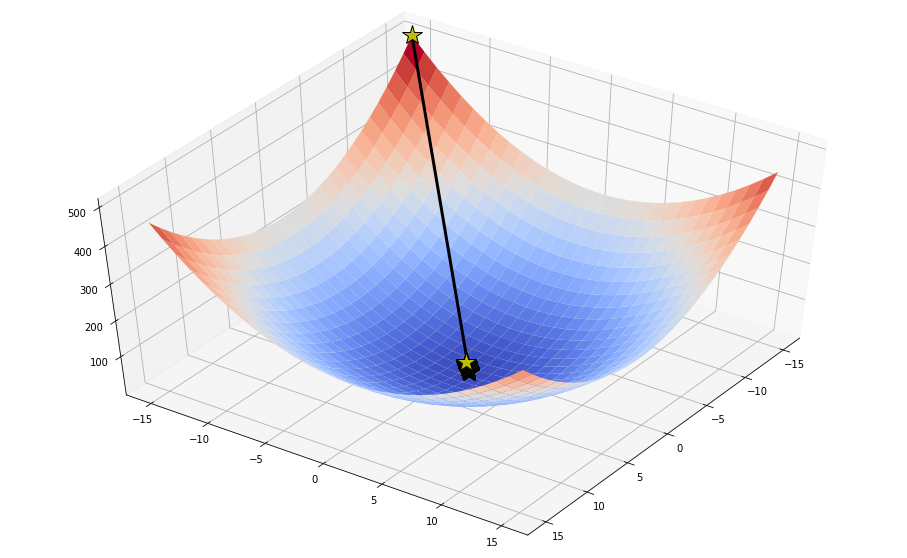

array([[-15.0, -15.0, 512.0],
       [0.9951790945870536, 0.9951790945870536, 4.6482258001152594e-05],
       [0.9854123070126488, 0.9854123070126488, 0.00042560157338643],
       [0.9756455194382441, 0.9756455194382441, 0.001186281446865895],
       [0.9658787318638393, 0.9658787318638393, 0.0023285218784395477],
       [0.9561119442894346, 0.9561119442894346, 0.003852322868107388],
       [0.9463451567150298, 0.9463451567150298, 0.005757684415869416],
       [0.9365783691406251, 0.9365783691406251, 0.008044606521725632],
       [0.9268115815662203, 0.9268115815662203, 0.010713089185676036],
       [0.9170447939918156, 0.9170447939918156, 0.013763132407720627],
       [0.9072780064174109, 0.9072780064174109, 0.017194736187859407],
       [0.8975112188430061, 0.8975112188430061, 0.02100790052609237],
       [0.8877444312686014, 0.8877444312686014, 0.025202625422419526],
       [0.8779776436941966, 0.8779776436941966, 0.02977891087684087],
       [0.8682108561197919, 0.8682108561197919,

In [13]:
example_get_coordinate_descent(search_dichotomous)

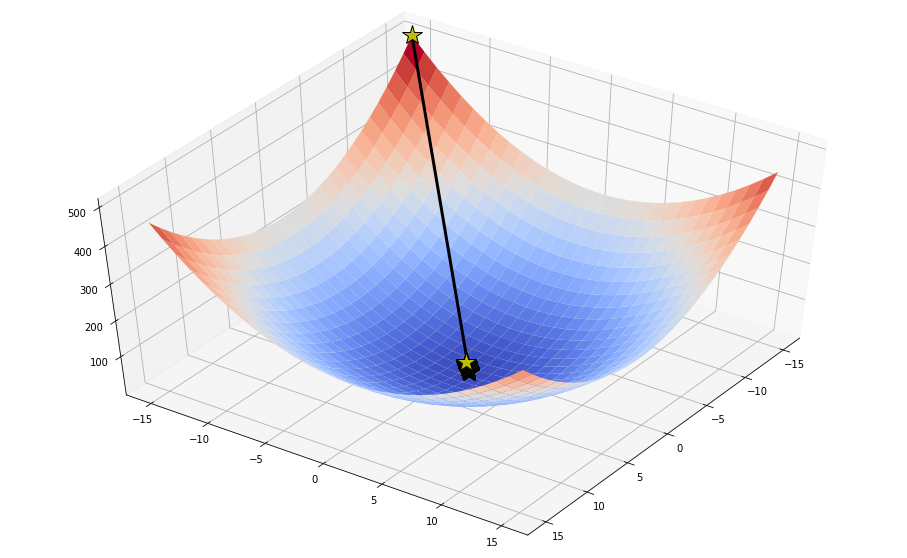

array([[-15.0, -15.0, 512.0],
       [0.9951790945870536, 0.9951790945870536, 4.6482258001152594e-05],
       [0.9854123070126488, 0.9854123070126488, 0.00042560157338643],
       [0.9756455194382441, 0.9756455194382441, 0.001186281446865895],
       [0.9658787318638393, 0.9658787318638393, 0.0023285218784395477],
       [0.9561119442894346, 0.9561119442894346, 0.003852322868107388],
       [0.9463451567150298, 0.9463451567150298, 0.005757684415869416],
       [0.9365783691406251, 0.9365783691406251, 0.008044606521725632],
       [0.9268115815662203, 0.9268115815662203, 0.010713089185676036],
       [0.9170447939918156, 0.9170447939918156, 0.013763132407720627],
       [0.9072780064174109, 0.9072780064174109, 0.017194736187859407],
       [0.8975112188430061, 0.8975112188430061, 0.02100790052609237],
       [0.8877444312686014, 0.8877444312686014, 0.025202625422419526],
       [0.8779776436941966, 0.8779776436941966, 0.02977891087684087],
       [0.8682108561197919, 0.8682108561197919,

In [12]:
example_get_coordinate_descent(cubicInterpolation)